In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Função de tratamento de dataset

def tratamento(df):
    df.drop(['Wearing Masks', 'Sanitization from Market', 'Abroad travel'], axis=1, inplace=True);

    df.replace('Yes', 1, inplace=True);
    df.replace('No', 0, inplace=True);
    return df;

In [4]:
# Carregando o dataset

df = pd.read_csv("dataset.csv");
df.shape

(5434, 21)

In [5]:
df.head(2)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes


Podemos usar os métodos `.info()`, `.value_counts()` e `.describe()` para obter informações básicas sobre quantidade presente dos dados, tipos e valores deles.

In [6]:
df = tratamento(df);

In [7]:
df.describe()


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,0.490063,0.519139,0.469452,0.501656,0.461907,0.518955,0.416268,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,0.499947,0.499680,0.499112,0.500043,0.498593,0.499687,0.492984,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


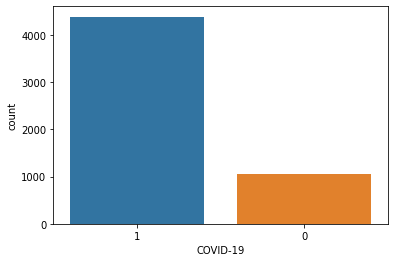

In [8]:
#Observa-se que o dataset está desbalanceado
sns.countplot(data=df, x='COVID-19', order=df['COVID-19'].value_counts().index)
plt.show()

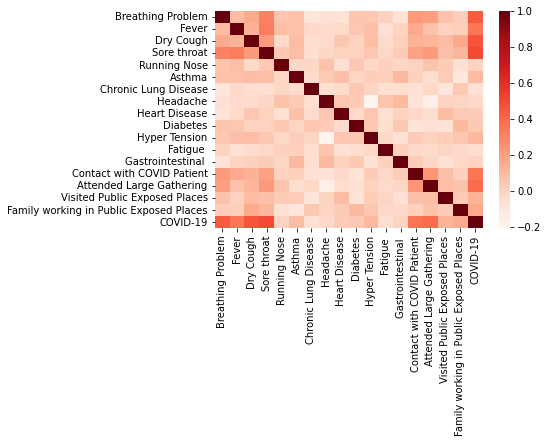

In [9]:
#df.corr().style.background_gradient(cmap='coolwarm', axis=None)
sns.heatmap(df.corr(), cmap="Reds")
plt.show()

In [11]:
correlation = abs(df[df.columns[:]].corr())['COVID-19'][:].sort_values(ascending=False)


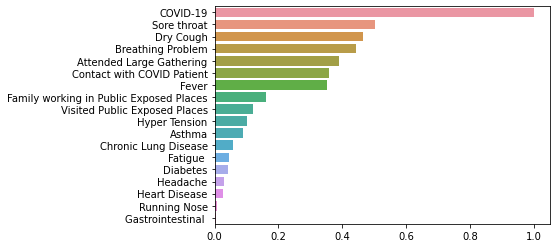

In [12]:
sns.barplot( x=correlation.values, y=correlation.index)
plt.show()

In [13]:

features = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places']

target = ['COVID-19']

X = df[features]
y = df[target]

In [14]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

y.value_counts()

COVID-19
0           4383
1           4383
dtype: int64

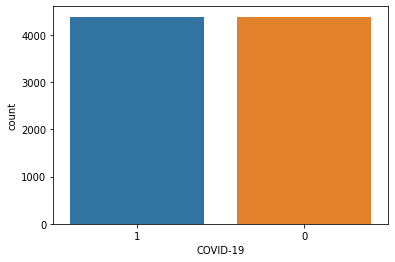

In [15]:
df2 = pd.concat([X, y], axis=1);
sns.countplot(data=df2, x='COVID-19', order=df2['COVID-19'].value_counts().index)
plt.show()

In [16]:
df2.isna().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
COVID-19                                   0
dtype: int64

## Criação do modelo

Comparação do desempenho de diversos modelos de classificação diferentes.

In [17]:
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import model_selection


In [18]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [19]:
models = []
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))

modeli = {
  "SVM": SVC(),
  "LR": LogisticRegression(solver='liblinear'),
  "DTC": DecisionTreeClassifier(),
  "RFC": RandomForestClassifier(),
}

In [20]:
results = []
names = []

for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='f1')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)



SVM: 0.680722 (0.446260)
LR: 0.590695 (0.397567)
DTC: 0.671349 (0.441412)
RFC: 0.677375 (0.444920)


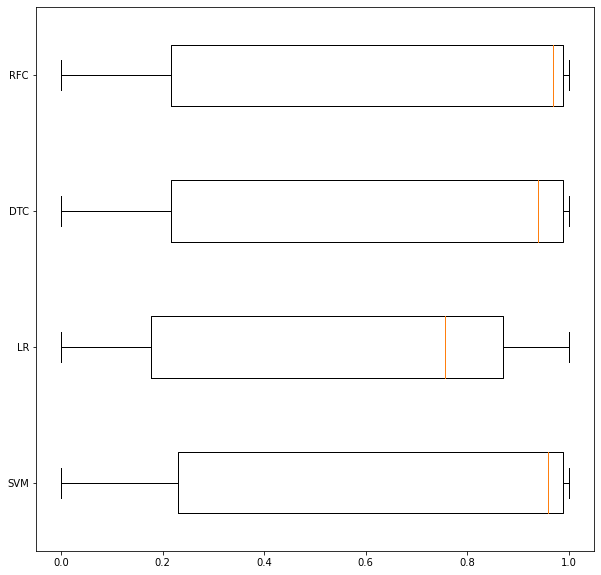

In [21]:
fig = plt.figure(figsize=(10,10))
#fig.suptitle('Figura 8 - Desempenho dos algoritmos de classificação')
ax = fig.add_subplot()
plt.boxplot(results, vert=False)
ax.set_yticklabels(names)
plt.show()

Abaixo, separamos os dados que queremos predizer dos dados que utilizamos como informações para a predição.

In [22]:
#split = train_valid_test_split(df, target = target, train_size=0.7,
#                                        valid_size=0.1, test_size=0.1)                                
#X_train, y_train, X_valid, y_valid, X_test, y_test = split

test_pct = 0.35 # Separaremos 20% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                         test_size=test_pct)

In [23]:

model_RFC = OneVsRestClassifier(RandomForestClassifier())
model_LG = LogisticRegression(solver='liblinear')

model_RFC.fit(X_train, y_train.values.ravel())
model_LG.fit(X_train, y_train.values.ravel())

y_pred_RFC = model_RFC.predict(X_test);
y_pred_LG = model_LG.predict(X_test);


f1_RFC = f1_score(y_test, y_pred_RFC);
f1_LG = f1_score(y_test, y_pred_LG);

print(f"Random Forest: {f1_RFC}")
print(f"Logistic Regression: {f1_LG}")

Random Forest: 0.9877280265339967
Logistic Regression: 0.9122225902616761


In [24]:
#Classificação

y_pred_LG

array([0, 1, 0, ..., 1, 0, 0])

In [25]:
pred = model_LG.predict_proba(X_test)

In [26]:
dataframe = pd.DataFrame(pred, columns = ['p_negativo', 'p_positivo'])

In [28]:
#Certeza associada a cada classificação

dataframe.head(20)

,p_negativo,p_positivo
0,0.997959,0.002041
1,0.000225,0.999775
2,0.843853,0.156147
3,0.119133,0.880867
4,0.135889,0.864111
5,0.762667,0.237333
6,0.338536,0.661464
7,0.895250,0.104750
8,0.014267,0.985733
9,0.000059,0.999941
